In [1]:
%run imports.py

Succesfully imported libraries and modules



## Bar plots for PAC power in OFF vs ON for all patients and for each patient separately

In [ ]:
def get_mean_pac_power(patient, day, ldopa):
    pass

In [2]:
p1 = load_patient(1)

Patient directory:  D:\LAB\AlexPAC\data\Patient1


In [4]:
patient = p1

norm_type = 'p'
p = 0.9

conditions = ["5Day OFF Rest 180sec", "5Day ON Rest 180sec"]
mean_pac_powers = [0, 0]
mean_beta_powers = [0, 0]

std_pac_powers = [0, 0]
std_beta_powers = [0, 0]

for i, condition in enumerate(conditions):
    
    pac_powers = np.zeros(len(patient.sorted_placements))
    beta_powers = np.zeros(len(patient.sorted_placements))
    
    for j, placement in enumerate(patient.sorted_placements):
        
        lfp = patient.lfp[condition][placement]
        
        beta_power = get_beta_power(lfp)
        
        pac = patient.pac[condition][placement][placement]  
        sig_pac = get_sig_pac(pac) 
        beta10 = np.argmin(np.abs(pac.beta_freqs - 10))
        beta35 = np.argmin(np.abs(pac.beta_freqs - 35))
        hfo140 = np.argmin(np.abs(pac.hfo_freqs - 140))
        pac_power = compute_matrix_norm(sig_pac[hfo140:, beta10:beta35 + 1], norm=norm_type, p=p)
        
        pac_powers[j] = pac_power
        beta_powers[j] = beta_power
        
    mean_pac_powers[i] = pac_powers.mean()
    mean_beta_powers[i] = beta_powers.mean()
    
    std_pac_powers[i] = pac_powers.std()
    std_beta_powers[i] = beta_powers.std()

In [14]:
pac_powers

0.00023980677327068033

Text(0.5, 1.0, 'PAC powers: OFF vs ON')

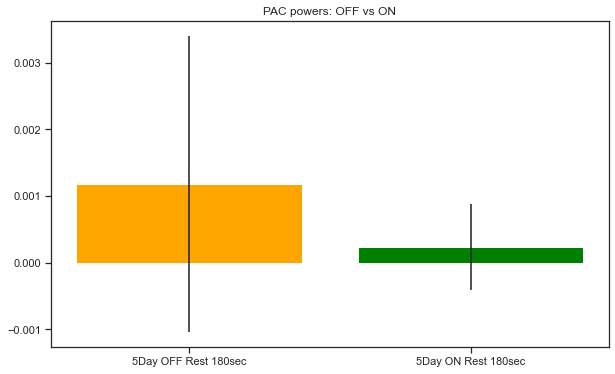

In [15]:
plt.bar(conditions, mean_pac_powers, color=['orange', 'green'], yerr=std_pac_powers)
plt.title("PAC powers: OFF vs ON")

Text(0.5, 1.0, 'Beta powers: OFF vs ON')

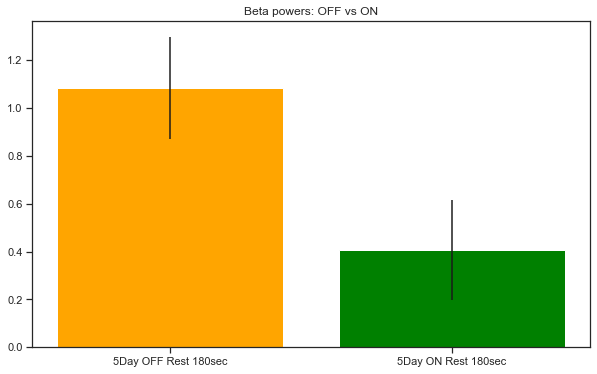

In [16]:
plt.bar(conditions, mean_beta_powers, color=['orange', 'green'], yerr=std_beta_powers)
plt.title("Beta powers: OFF vs ON")

## All patients (1, 2, 3, 5, 6)

In [17]:
p1 = load_patient(1)

Patient directory:  D:\LAB\AlexPAC\data\Patient1


In [18]:
p2 = load_patient(2)

Patient directory:  D:\LAB\AlexPAC\data\Patient2


In [19]:
p3 = load_patient(3)

Patient directory:  D:\LAB\AlexPAC\data\Patient3


In [20]:
p5 = load_patient(5)

Patient directory:  D:\LAB\AlexPAC\data\Patient5


In [21]:
p6 = load_patient(6)

Patient directory:  D:\LAB\AlexPAC\data\Patient6


In [24]:
norm_type = 'p'
p = 0.9
patients = [p1, p2, p3, p5, p6]

global_pac_powers_off = []
global_pac_powers_on = []

global_beta_powers_off = []
global_beta_powers_on = []

for patient in tqdm(patients, total=len(patients)):

    conditions = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec", "5Day OFF Rest 180sec", "5Day ON Rest 180sec"]

    for i, condition in enumerate(conditions):
        
        if condition not in patient.conditions:
            continue
            
        pac_powers = np.zeros(len(patient.sorted_placements))
        beta_powers = np.zeros(len(patient.sorted_placements))

        for j, placement in enumerate(patient.sorted_placements):
            
            # beta power
            lfp = patient.lfp[condition][placement]
            beta_power = get_beta_power(lfp)
            
            # pac power
            pac = patient.pac[condition][placement][placement]  
            sig_pac = get_sig_pac(pac) 
            beta10 = np.argmin(np.abs(pac.beta_freqs - 10))
            beta35 = np.argmin(np.abs(pac.beta_freqs - 35))
            hfo140 = np.argmin(np.abs(pac.hfo_freqs - 140))
            pac_power = compute_matrix_norm(sig_pac[hfo140:, beta10:beta35 + 1], norm=norm_type, p=p)
            
            # append to global array
            if "OFF" in condition:
                global_pac_powers_off.append(pac_power)
                global_beta_powers_off.append(beta_power)
            if "ON" in condition:
                global_pac_powers_on.append(pac_power)
                global_beta_powers_on.append(beta_power)
                
global_pac_powers_off = np.array(global_pac_powers_off)
global_beta_powers_off = np.array(global_beta_powers_off)
global_pac_powers_on = np.array(global_pac_powers_on)
global_beta_powers_on = np.array(global_beta_powers_on)

  0%|          | 0/5 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Beta powers: OFF vs ON')

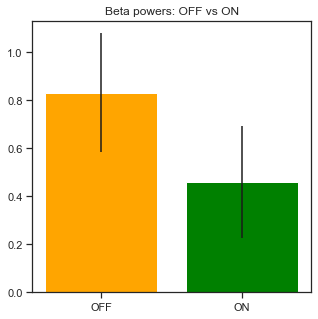

In [35]:
fig = plt.figure(figsize=(5, 5))
plt.bar(x=     ['OFF', 'ON'],
        height=[global_beta_powers_off.mean(), global_beta_powers_on.mean()], 
        color= ['orange', 'green'], 
        yerr=  [global_beta_powers_off.std(), global_beta_powers_on.std()])
plt.title("Beta powers: OFF vs ON")

### Boxplot: mean PAC powers OFF vs ON (global)

Text(0.5, 1.0, 'PAC powers: OFF vs ON')

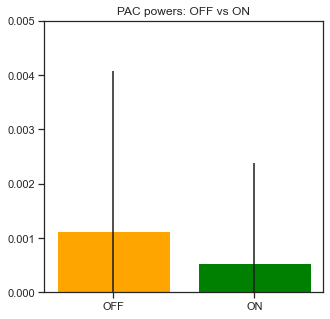

In [54]:
fig = plt.figure(figsize=(5, 5))
plt.bar(x=     ['OFF', 'ON'],
        height=[global_pac_powers_off.mean(), global_pac_powers_on.mean()], 
        color= ['orange', 'green'],
        yerr=  [global_pac_powers_off.std(), global_pac_powers_on.std()])
plt.ylim((0, 0.005))
plt.title("PAC powers: OFF vs ON")

In [43]:
df_pac_powers = pd.DataFrame(data=np.array([global_pac_powers_off, global_pac_powers_on]).T, columns=["OFF", 'ON'])

df_pac_powers

,OFF,ON
0,0.000294,0.000000
1,0.000060,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
265,0.000000,0.000280
266,0.000049,0.000000
267,0.000000,0.000000
268,0.000000,0.000318


In [45]:
df_beta_powers = pd.DataFrame(data=np.array([global_beta_powers_off, global_beta_powers_on]).T, columns=["OFF", 'ON'])

df_beta_powers

,OFF,ON
0,0.642570,0.532455
1,0.646216,0.501232
2,0.634618,0.471097
3,0.643629,0.000000
4,0.551796,0.000000
...,...,...
265,0.305813,0.715305
266,0.410675,0.589151
267,0.791573,0.734027
268,0.717140,0.655635


### Boxplot: PAC powers (with outliers) - seaborn

<AxesSubplot:>

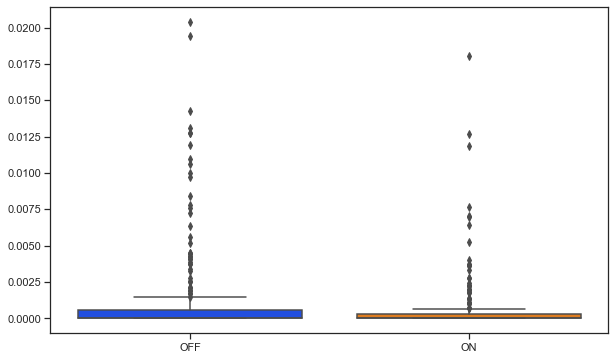

In [44]:
sns.boxplot(data=df_pac_powers)

### Violin plot OFF vs ON

<AxesSubplot:>

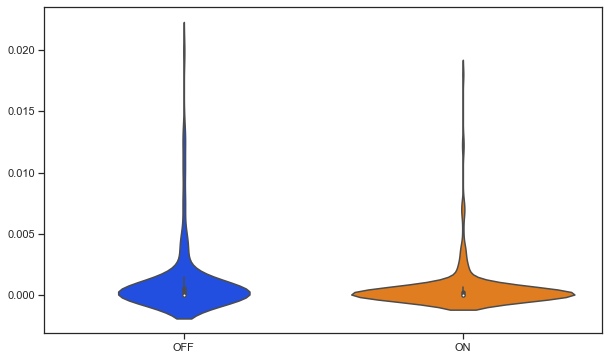

In [55]:
sns.violinplot(data=df_pac_powers)

(array([  4.,   4., 173.,  66.,  11.,   3.,   4.,   3.,   0.,   2.]),
 array([-8.19526203e-03, -5.43596951e-03, -2.67667698e-03,  8.26155446e-05,
         2.84190807e-03,  5.60120060e-03,  8.36049312e-03,  1.11197856e-02,
         1.38790782e-02,  1.66383707e-02,  1.93976632e-02]),
 <BarContainer object of 10 artists>)

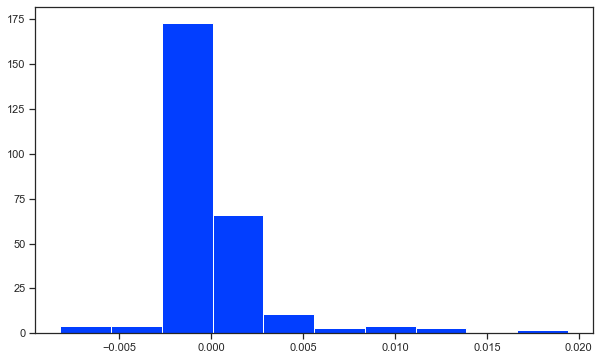

In [56]:
plt.hist(global_pac_powers_off - global_pac_powers_on)

### Difference (OFF - ON) distribution KDE

<AxesSubplot:ylabel='Density'>

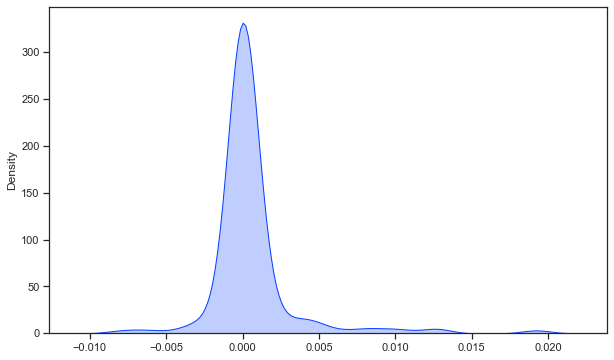

In [65]:
sns.kdeplot(global_pac_powers_off - global_pac_powers_on, shade=True)

In [78]:
np.min(global_pac_powers_off[global_pac_powers_off > 0])

4.935316978590028e-05

In [94]:
both_nonzero = (global_pac_powers_off > 0.5e-4) & (global_pac_powers_on > 0.5e-4)

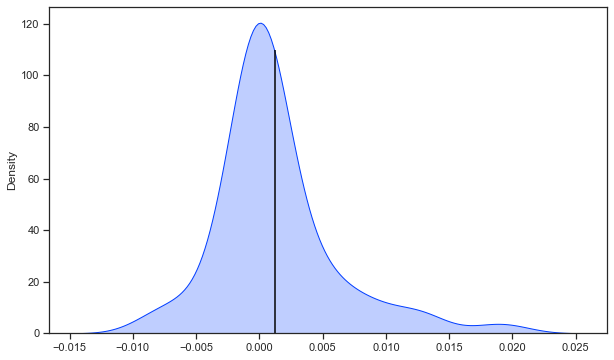

In [95]:
diff = global_pac_powers_off[both_nonzero] - global_pac_powers_on[both_nonzero]
sns.kdeplot(diff, shade=True)
plt.vlines(diff.mean(), 0, 110, colors='black')

In [61]:
np.sum(global_pac_powers_off < global_pac_powers_on)

61

<AxesSubplot:>

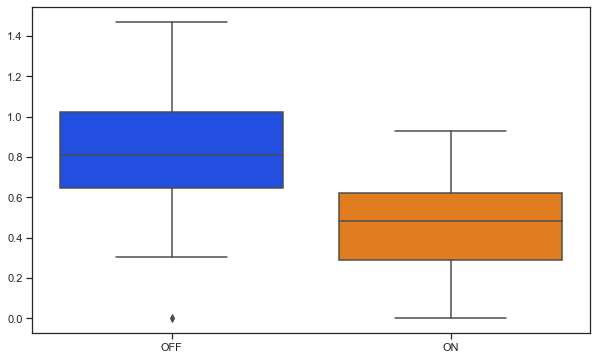

In [46]:
sns.boxplot(data=df_beta_powers)

### KDE plot OFF, KDE plot ON

<AxesSubplot:ylabel='Density'>

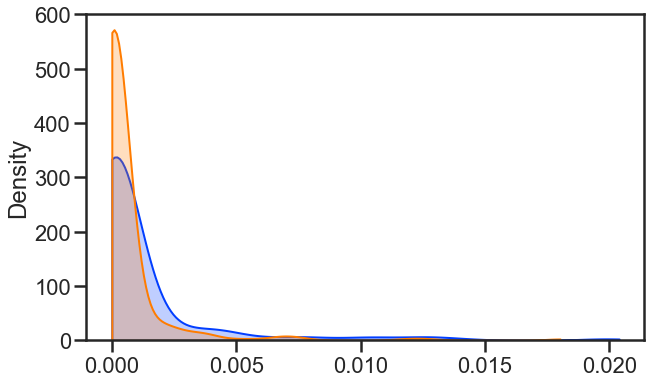

In [213]:
sns.kdeplot(global_pac_powers_off, cut=1e-4, shade=True)
sns.kdeplot(global_pac_powers_on, cut=1e-4, shade=True)

(array([248.,  11.,   4.,   3.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([0.        , 0.00180161, 0.00360322, 0.00540483, 0.00720644,
        0.00900805, 0.01080966, 0.01261127, 0.01441289, 0.0162145 ,
        0.01801611]),
 <BarContainer object of 10 artists>)

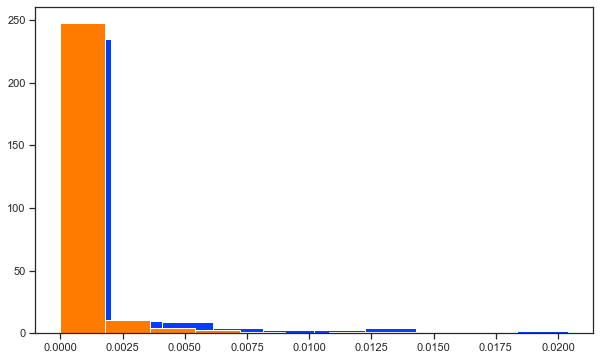

In [51]:
plt.hist(global_pac_powers_off)
plt.hist(global_pac_powers_on)

### Scatter plot

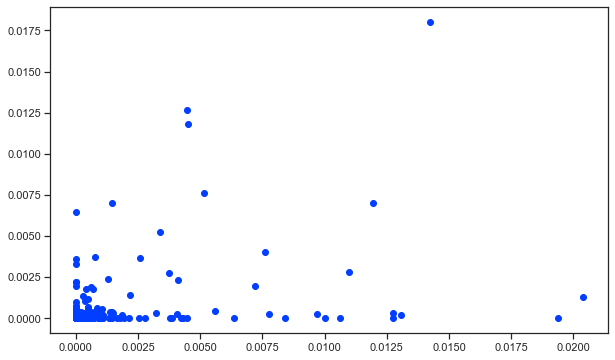

In [215]:
sns.set_context('notebook')
plt.scatter(global_pac_powers_off, global_pac_powers_on)

In [220]:
rho, pval = stats.spearmanr(global_pac_powers_off, global_pac_powers_on)

In [221]:
rho

0.29949126457256087

## Summed PAC matrices for patient OFF vs ON

In [101]:
patients = [p1, p2, p3, p5, p6]

sample_pac = p1.pac["1Day OFF Rest 180sec"]["L1-2A"]["L1-2A"]
sig_pac = get_sig_pac(pac) 
beta10 = np.argmin(np.abs(pac.beta_freqs - 10))
beta35 = np.argmin(np.abs(pac.beta_freqs - 35))
hfo140 = np.argmin(np.abs(pac.hfo_freqs - 140))

pac_matrices_for_patient_off = {patient.name: np.zeros_like(sig_pac[hfo140:, beta10:beta35 + 1]) for patient in patients}
pac_matrices_for_patient_on = {patient.name: np.zeros_like(sig_pac[hfo140:, beta10:beta35 + 1]) for patient in patients}

for patient in tqdm(patients, total=len(patients)):

    conditions = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec", "5Day OFF Rest 180sec", "5Day ON Rest 180sec"]

    for i, condition in enumerate(conditions):
        
        if condition not in patient.conditions:
            continue
            
        pac_powers = np.zeros(len(patient.sorted_placements))
        beta_powers = np.zeros(len(patient.sorted_placements))

        for j, placement in enumerate(patient.sorted_placements):
            
            # beta power
            lfp = patient.lfp[condition][placement]
            beta_power = get_beta_power(lfp)
            
            # pac power
            pac = patient.pac[condition][placement][placement]  
            sig_pac = get_sig_pac(pac) 
            beta10 = np.argmin(np.abs(pac.beta_freqs - 10))
            beta35 = np.argmin(np.abs(pac.beta_freqs - 35))
            hfo140 = np.argmin(np.abs(pac.hfo_freqs - 140))
            pac_matrix = sig_pac[hfo140:, beta10:beta35 + 1]
            
            # append to global array
            if "OFF" in condition:
                pac_matrices_for_patient_off[patient.name] += pac_matrix

            if "ON" in condition:
                pac_matrices_for_patient_on[patient.name] += pac_matrix

  0%|          | 0/5 [00:00<?, ?it/s]

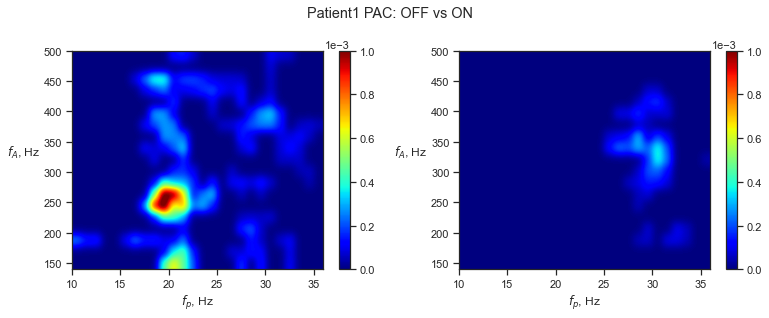

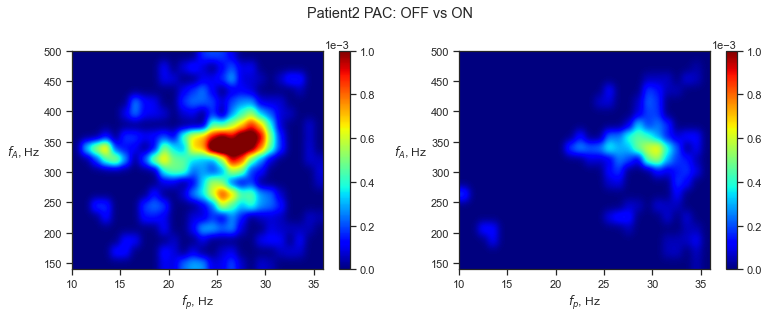

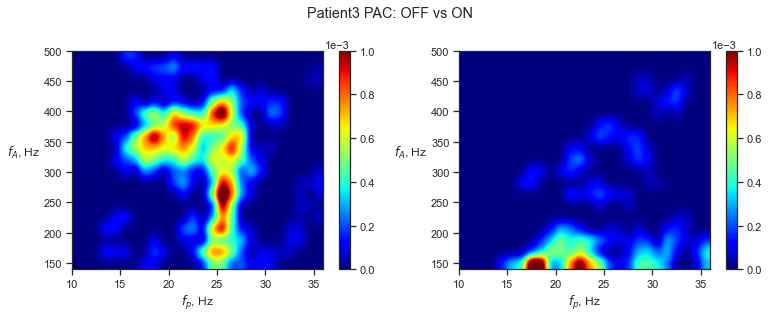

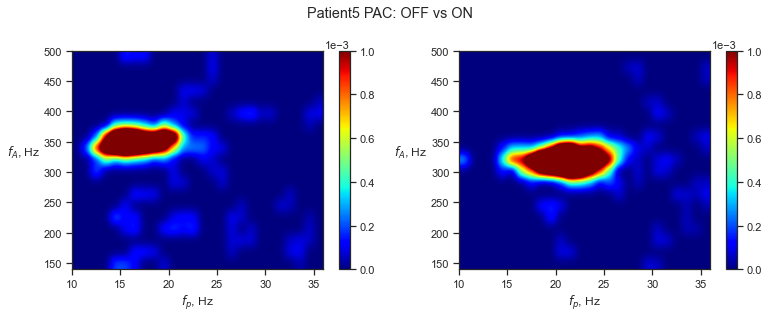

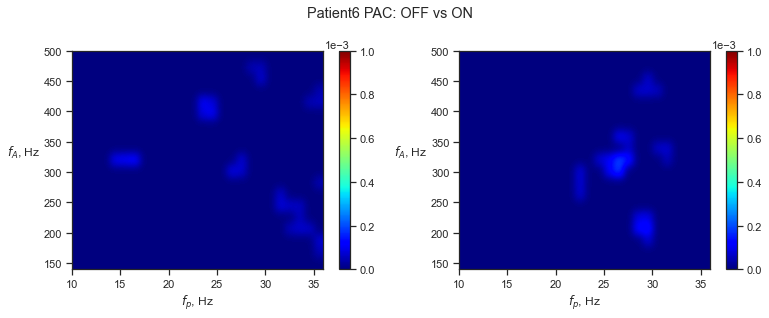

In [112]:
pac = p1.pac["1Day OFF Rest 180sec"]["R4-3A"]["R2A-3A"]


for patient in patients:
    fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
    plt.suptitle(f"{patient.name} PAC: OFF vs ON")
    
    ax = axes[0]
    im = comodulogram(pac_matrices_for_patient_off[patient.name], 
                     pac.beta_params, 
                     pac.hfo_params, 
                     pvalues=pac.pvalues, 
                     significant=False, significance=0.01,
                     vmax=0.001, smooth=True,
                     ax=ax)
    ax.set_xlabel(r"$f_p$, Hz")
    ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
    cbar = fig.colorbar(im, ax=ax)
    cbar.formatter.set_powerlimits((0, 0))
    #ax.grid()
    
    ax = axes[1]
    im = comodulogram(pac_matrices_for_patient_on[patient.name], 
                     pac.beta_params, 
                     pac.hfo_params, 
                     pvalues=pac.pvalues, 
                     significant=False, significance=0.01,
                     vmax=0.001, smooth=True,
                     ax=ax)
    ax.set_xlabel(r"$f_p$, Hz")
    ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
    cbar = fig.colorbar(im, ax=ax)
    cbar.formatter.set_powerlimits((0, 0))
    #ax.grid()
    plt.tight_layout()

In [203]:
pac_total_off = np.sum(np.array(list(pac_matrices_for_patient_off.values())), axis=0)

pac_total_off.shape

(19, 26)

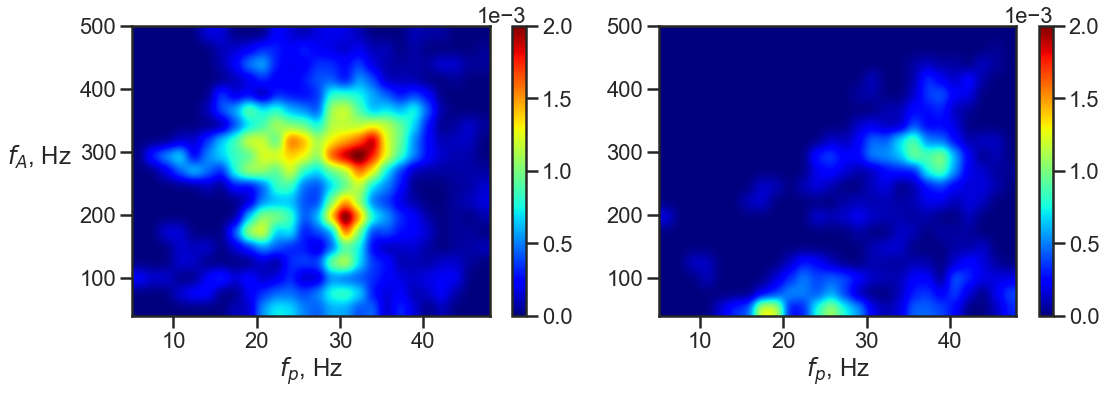

In [223]:
sns.set_context('poster')

pac_total_off = np.sum(np.array(list(pac_matrices_for_patient_off.values())[:-2]), axis=0)
pac_total_on = np.sum(np.array(list(pac_matrices_for_patient_on.values())[:-2]), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#plt.suptitle(f"{patient.name} PAC: OFF vs ON")

ax = axes[0]
im = comodulogram(pac_total_off, 
                 pac.beta_params, 
                 pac.hfo_params, 
                 pvalues=pac.pvalues, 
                 significant=False, significance=0.01,
                 vmax=0.002, smooth=True,
                 ax=ax)
ax.set_xlabel(r"$f_p$, Hz")
ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=40)
cbar = fig.colorbar(im, ax=ax)
cbar.formatter.set_powerlimits((0, 0))
#ax.grid()

ax = axes[1]
im = comodulogram(pac_total_on, 
                 pac.beta_params, 
                 pac.hfo_params, 
                 pvalues=pac.pvalues, 
                 significant=False, significance=0.01,
                 vmax=0.002, smooth=True,
                 ax=ax)
ax.set_xlabel(r"$f_p$, Hz")
#ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
cbar = fig.colorbar(im, ax=ax)
cbar.formatter.set_powerlimits((0, 0))
#ax.grid()
plt.tight_layout()

plt.savefig(os.path.join(data_path, 'im_common', 'pac_offvson_collective.png'), dpi=200, bbox_inches='tight')

## Spectra examples

In [164]:
patient = p3

condition = "1Day OFF Rest 180sec"

for placement in patient.sorted_placements:

    lfp = patient.lfp[condition][placement]
    fig = plt.figure(figsize=(4, 4))
    lfp.show_psd((4, 60), smooth=False, sigma=1, log=True, color="#019789", linewidth=2)
    plt.grid(which='both', linewidth=0.5)
    plt.title(placement)
    #plt.show()
    plt.close(fig)

In [165]:
with open('path_data.txt', 'r') as f:
    data_path = f.readline()

### Beta PSD example

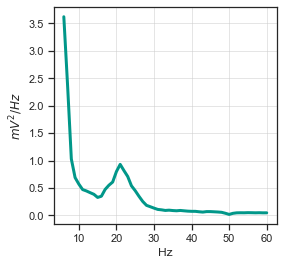

In [170]:
placement = "L2A-2C"

lfp = patient.lfp[condition][placement]
fig = plt.figure(figsize=(4, 4))
lfp.show_psd((6, 60), smooth=False, sigma=1, log=False, color="#019789", linewidth=3)
plt.grid(which='both', linewidth=0.5)
plt.title("")
#plt.show()
plt.savefig(os.path.join(data_path, 'im_common', 'psd_beta_example.png'), dpi=200, bbox_inches='tight')

### HFO example

In [159]:
from scipy.ndimage import gaussian_filter1d


condition = "1Day ON Rest 180sec"
for placement in p3.sorted_placements[::1]:
    
    lfp = p3.lfp[condition][placement]
    lfp_data = lfp.data.copy()
    lfp_data = lfp_data / np.std(lfp_data)

    lfp_norm = LFP(lfp_data, lfp.sf, lfp.patient_name, lfp.condition, lfp.placement)
    
    f, y = lfp_norm.get_psd(smooth=True, sigma=2)
    
    #y /= np.sum(y)

    mask = (f > 10) & (f < 500)
    
    f_hat, y_hat = f[mask], y[mask]
    y_hat -= np.min(y_hat)
    sigma=3
    y_hat = gaussian_filter1d(y_hat, sigma)
    p = 2
    
    #print(placement)
    for power_type in ['max', 'mean', 'p', 'std']:
        power = get_power(y_hat, power_type, p)
        #print(f"{power_type}: {power * 1e3:.2f}")
    
    fig = plt.figure(figsize=(5, 3))
    plt.plot(f_hat, y_hat, alpha=0.8, label=placement, color="#019789", linewidth=2.5)

    #lfp.show_psd(show_freqs=(50, 500))
    #plt.legend()
    plt.ylim((0, 0.0005))
    plt.grid()
    #plt.show()
    plt.close(fig)

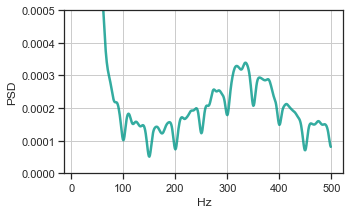

In [162]:
placement = "R2A-2C"

lfp = patient.lfp[condition][placement]
lfp_data = lfp.data.copy()
lfp_data = lfp_data / np.std(lfp_data)

lfp_norm = LFP(lfp_data, lfp.sf, lfp.patient_name, lfp.condition, lfp.placement)

f, y = lfp_norm.get_psd(smooth=True, sigma=2)

#y /= np.sum(y)

mask = (f > 10) & (f < 500)

f_hat, y_hat = f[mask], y[mask]
y_hat -= np.min(y_hat)
sigma=3
y_hat = gaussian_filter1d(y_hat, sigma)
p = 2

#print(placement)
for power_type in ['max', 'mean', 'p', 'std']:
    power = get_power(y_hat, power_type, p)
    #print(f"{power_type}: {power * 1e3:.2f}")

fig = plt.figure(figsize=(5, 3))
plt.plot(f_hat, y_hat, alpha=0.8, label=placement, color="#019789", linewidth=2.5)

#lfp.show_psd(show_freqs=(50, 500))
#plt.legend()
plt.ylim((0, 0.0005))
plt.grid()
plt.xlabel("Hz")
plt.ylabel("PSD")
plt.savefig(os.path.join(data_path, 'im_common', 'psd_hfo_example.png'), dpi=200, bbox_inches='tight')

## Comodulograms

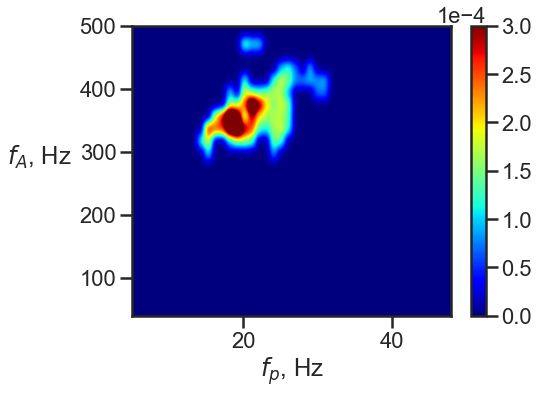

In [196]:
patient = p3

sns.set_context('poster')

condition = "1Day OFF Rest 180sec"
placement = "L4-3A"

pac = p3.pac[condition][placement][placement]
sig_pac = get_sig_pac(pac)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
im = comodulogram(sig_pac, 
                     pac.beta_params, 
                     pac.hfo_params, 
                     pvalues=pac.pvalues, 
                     significant=False, significance=0.01,
                     vmax=0.0003, smooth=True,
                     ax=ax)
ax.set_xlabel(r"$f_p$, Hz")
ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=40)
cbar = fig.colorbar(im, ax=ax)
cbar.formatter.set_powerlimits((0, 0))
plt.tight_layout()

plt.savefig(os.path.join(data_path, 'im_common', 'pac_example.png'), dpi=200, bbox_inches='tight')

$ PAC(f_p, f_A) = KL\left(P(f_p, f_A), U[-\pi; \pi]\right), $

где $KL$ - расстояние Кульбака-Лейблера, 

$P(f_p, f_A)$ - распределение амплитуд ВЧ-компоненты по фазам НЧ-компоненты. 

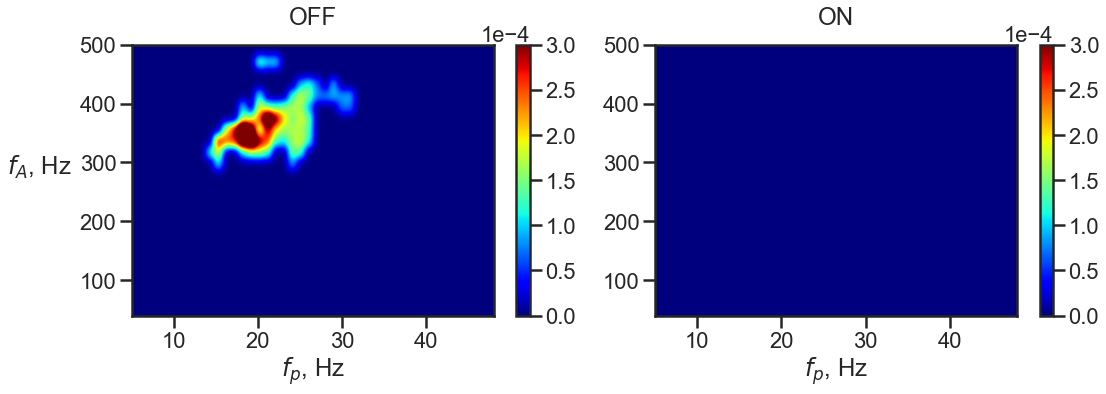

In [195]:
patient = p3

sns.set_context('poster')

conditions = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec"]
placement = "L4-3A"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]

pac = p3.pac[conditions[0]][placement][placement]
sig_pac = get_sig_pac(pac)


im = comodulogram(sig_pac, 
                     pac.beta_params, 
                     pac.hfo_params, 
                     pvalues=pac.pvalues, 
                     significant=False, significance=0.01,
                     vmax=0.0003, smooth=True,
                     ax=ax)
ax.set_xlabel(r"$f_p$, Hz")
ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=40)
ax.set_title("OFF", pad=20)
cbar = fig.colorbar(im, ax=ax)
cbar.formatter.set_powerlimits((0, 0))
plt.tight_layout()

ax = axes[1]

pac = p3.pac[conditions[1]][placement][placement]
sig_pac = get_sig_pac(pac)


im = comodulogram(sig_pac, 
                     pac.beta_params, 
                     pac.hfo_params, 
                     pvalues=pac.pvalues, 
                     significant=False, significance=0.01,
                     vmax=0.0003, smooth=True,
                     ax=ax)
ax.set_xlabel(r"$f_p$, Hz")
#ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=40)
cbar = fig.colorbar(im, ax=ax)
cbar.formatter.set_powerlimits((0, 0))
ax.set_title("ON", pad=20)
plt.tight_layout()


plt.savefig(os.path.join(data_path, 'im_common', 'pac_offvson_example.png'), dpi=200, bbox_inches='tight')